# New York City Airbnb Open Data

Dataset from: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data/code?datasetId=268833

In [1]:
import pandas as pd
import numpy as np
import missingno

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')
len(df)

48895

In [3]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [4]:
# Меняем первичный ключ на колонку id
df = df.set_index('id')
df.head(10)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0


## Исследовательский анализ данных (Exploratory data analysis)

In [5]:
df.dtypes

name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
df.isnull().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<Axes: >

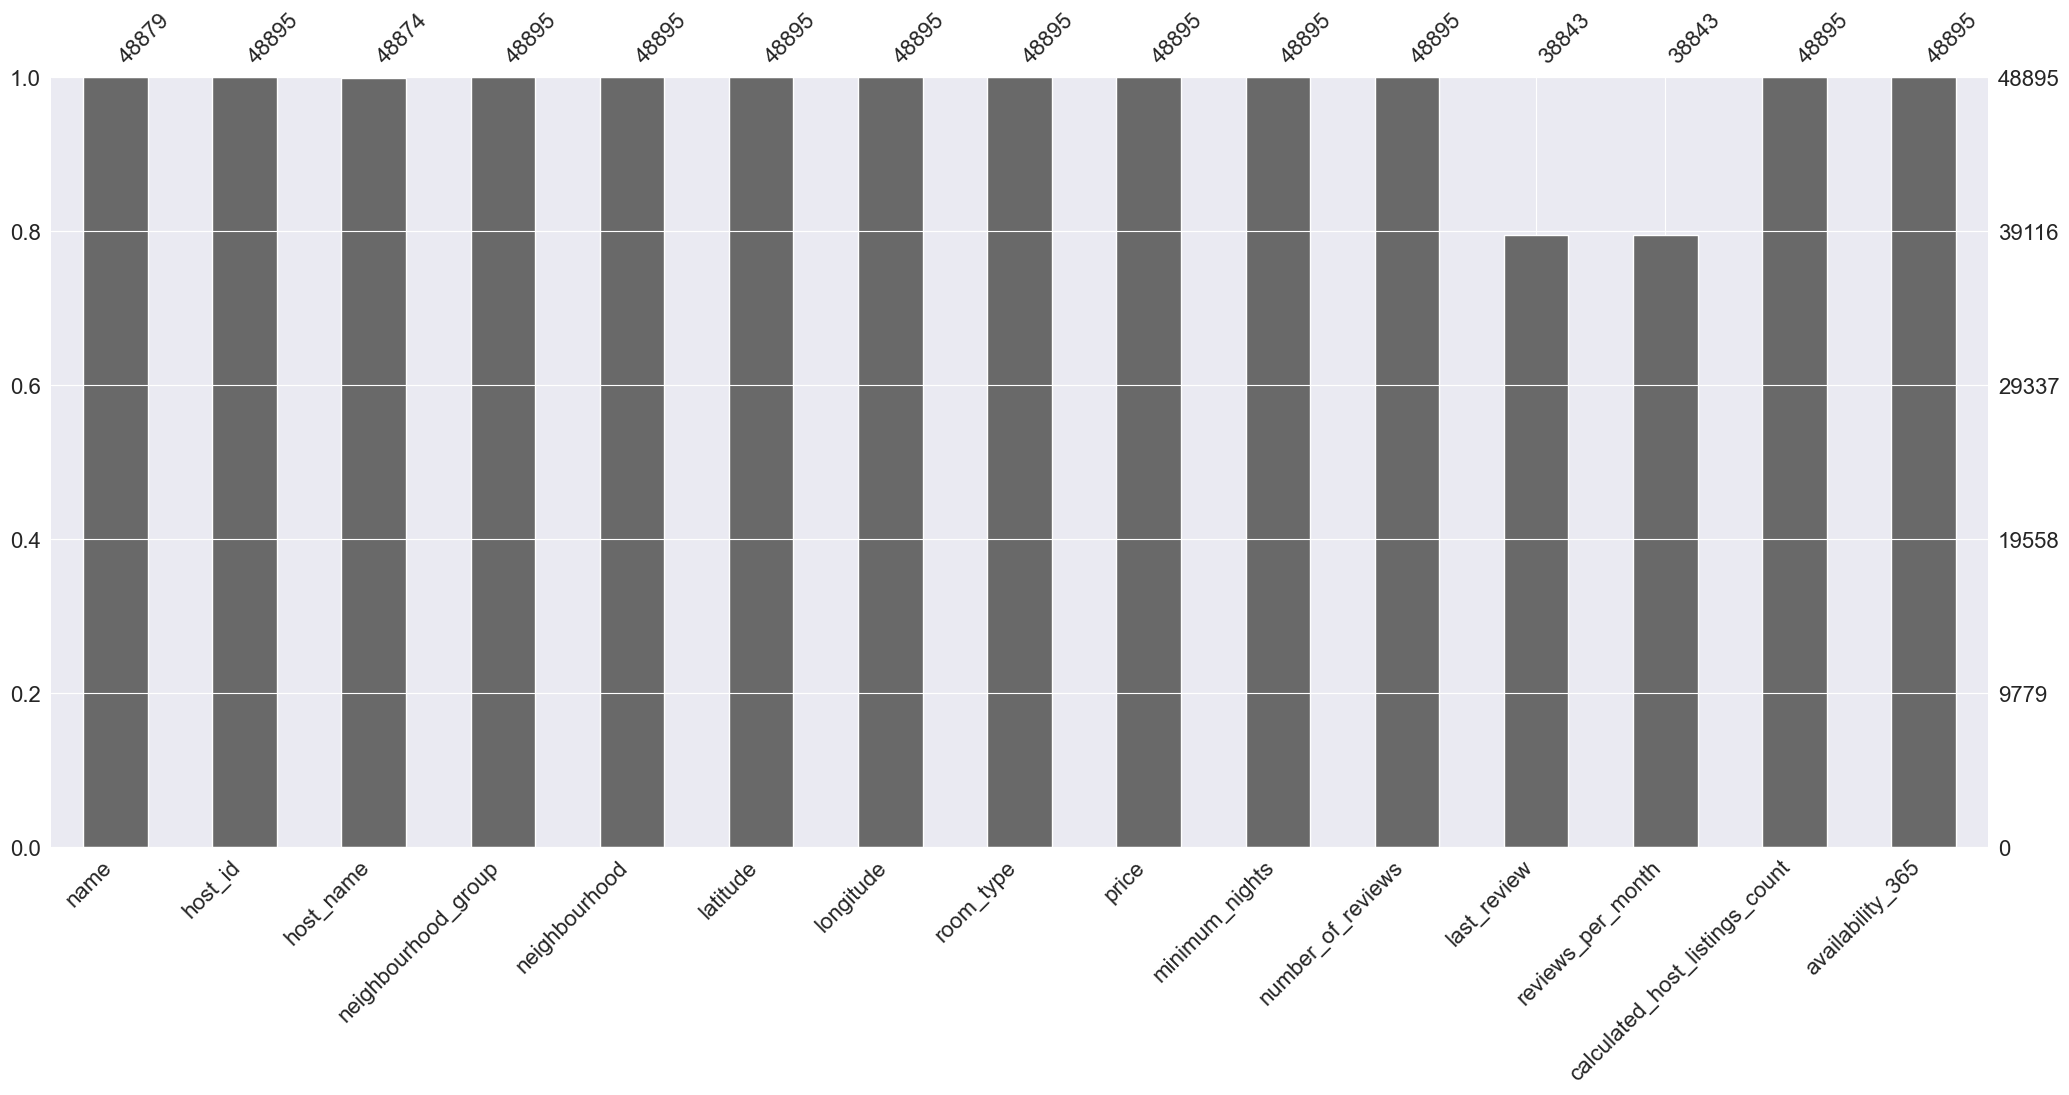

In [7]:
missingno.bar(df)

<Axes: >

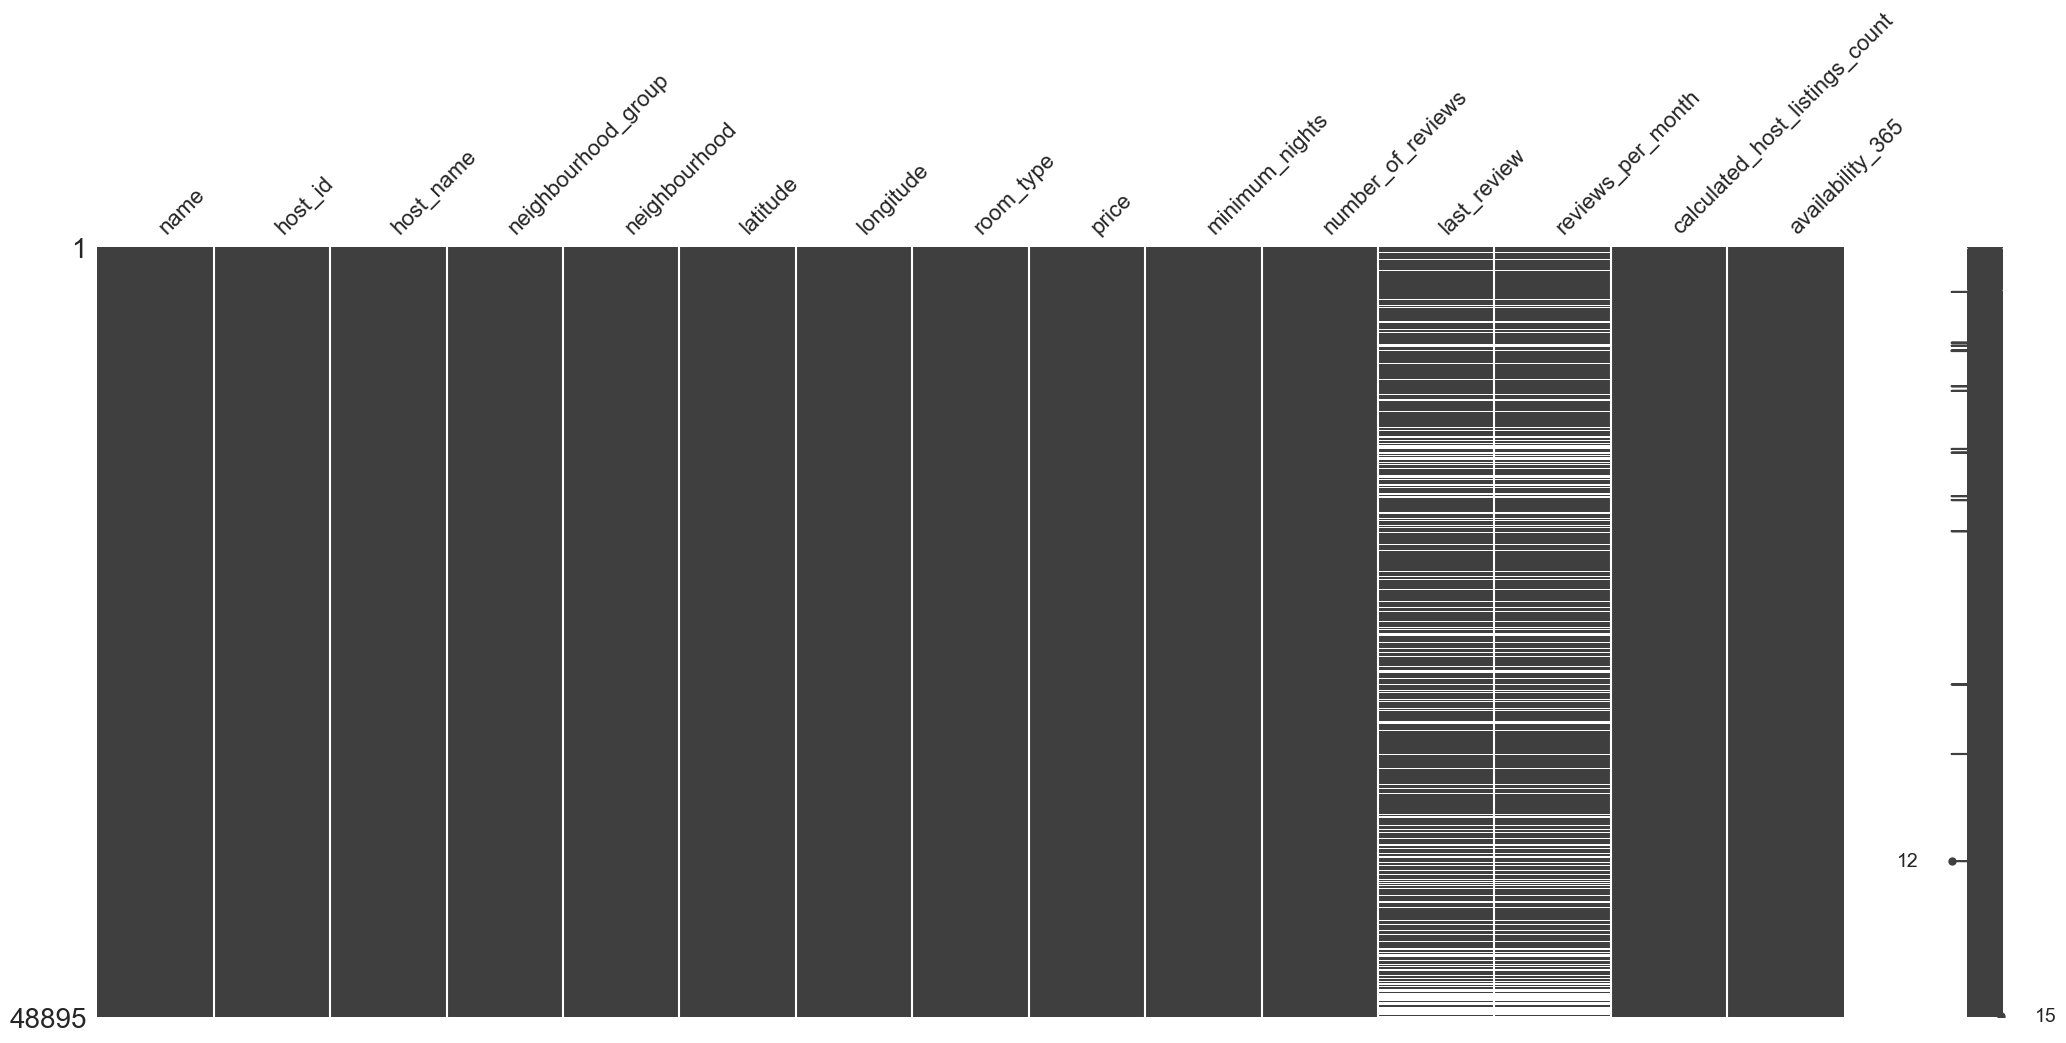

In [8]:
missingno.matrix(df)

In [9]:
len(df)

48895

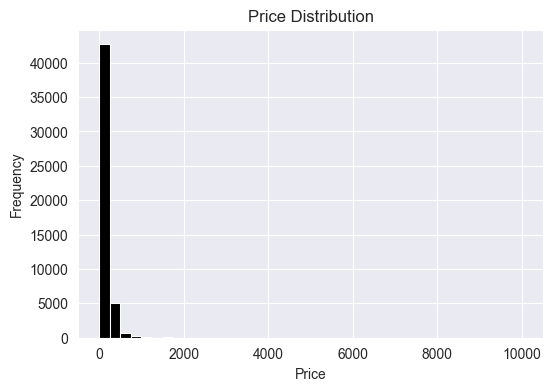

In [10]:
plt.figure(figsize=(6,4))

sns.histplot(df.price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Price Distribution')

plt.show()

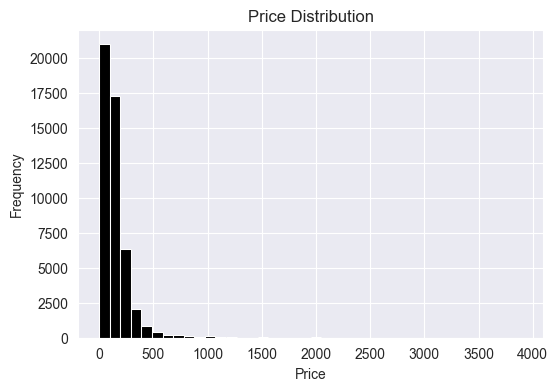

In [11]:
# Увеличиваем масштаб

plt.figure(figsize=(6,4))

sns.histplot(df.price[df.price < 4000], bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Price Distribution')

plt.show()

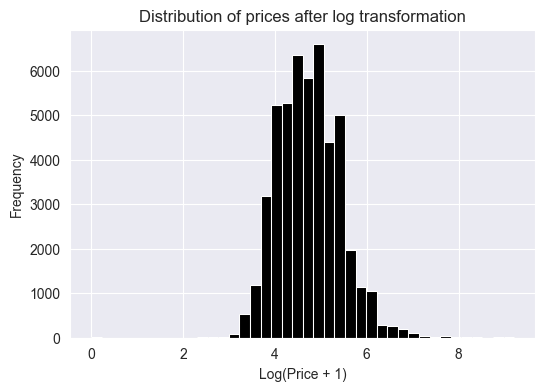

In [12]:
# Применяем логарифмирование цены для устранения эффекта хвоста

log_price = np.log1p(df.price)

plt.figure(figsize=(6,4))

sns.histplot(log_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log transformation')

plt.show()

# Описательная статистика

In [13]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<Axes: >

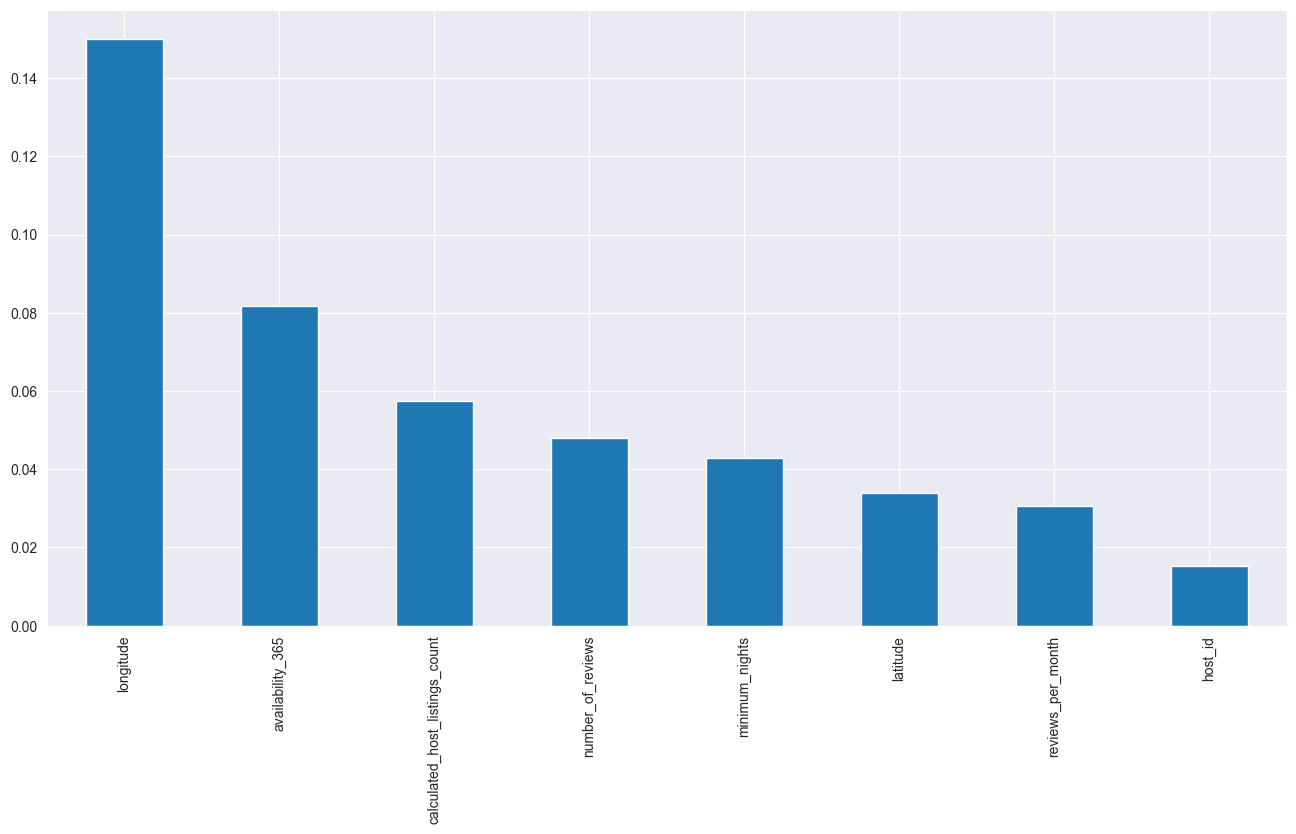

In [14]:
df.select_dtypes(include=[np.number]).corr()['price'].drop('price').abs().sort_values(ascending=False).plot(kind='bar', figsize=(16,8))

## Обработка данных

In [15]:
# Заменяем пропущенные значения в колонках name, host_name, reviews_per_month, last_review

columns_to_fill = ['name', 'host_name', 'reviews_per_month', 'last_review']
df[columns_to_fill] = df[columns_to_fill].fillna(0)

In [16]:
# Сохраним название объектов в отдельную переменную
object_names = df[['name', 'neighbourhood']].copy()
# Преобразование object_names в датафрейм, чтобы добавить колонку 'id'
object_names = pd.DataFrame(object_names)
object_names['id'] = object_names.index

object_names.head(20)

,name,neighbourhood,id
id,,,
2539,Clean & quiet apt home by the park,Kensington,2539
2595,Skylit Midtown Castle,Midtown,2595
3647,THE VILLAGE OF HARLEM....NEW YORK !,Harlem,3647
3831,Cozy Entire Floor of Brownstone,Clinton Hill,3831
5022,Entire Apt: Spacious Studio/Loft by central park,East Harlem,5022
5099,Large Cozy 1 BR Apartment In Midtown East,Murray Hill,5099
5121,BlissArtsSpace!,Bedford-Stuyvesant,5121
5178,Large Furnished Room Near B'way,Hell's Kitchen,5178
5203,Cozy Clean Guest Room - Family Apt,Upper West Side,5203


In [17]:
# Удаление колонки 'last_review'
df = df.drop(columns=['last_review', 'name'])

In [18]:
df.isna().sum()

host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [19]:
df.dtypes

host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [20]:
# Функция для вывода и подсчета всех уникальных значений в указанных колонках
def count_unique_values(df, columns):
    for column in columns:
        unique_values_count = df[column].nunique()
        unique_values = df[column].value_counts()
        print(f"Уникальные значения в колонке '{column}':")
        print(unique_values)
        print(f"Количество уникальных значений в колонке '{column}': {unique_values_count}")
        print()


In [21]:
# Колонки для анализа
columns_to_analyze = ['room_type', 'neighbourhood', 'neighbourhood_group', 'host_name']

# Вызов функции для вывода и подсчета уникальных значений
count_unique_values(df, columns_to_analyze)

Уникальные значения в колонке 'room_type':
room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64
Количество уникальных значений в колонке 'room_type': 3

Уникальные значения в колонке 'neighbourhood':
neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64
Количество уникальных значений в колонке 'neighbourhood': 221

Уникальные значения в колонке 'neighbourhood_group':
neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64
Количество уникальных значений в колонке 'neighbourhood_group': 5

Уникальные значения в колонке 'host_name':
host_

Визуализация данных:

In [22]:
def get_cols(df) -> list:
    """
    Функция возвращает список категориальных и числовых переменных.
    """
    categorical_feature_mask = df.dtypes == object
    number_feature_mask = df.dtypes != object
    numbers_cols = df.columns[number_feature_mask].tolist()
    categorical_cols = df.columns[categorical_feature_mask].tolist()
    return [numbers_cols, categorical_cols]

In [23]:
numbers_cols, categorical_cols = get_cols(df)

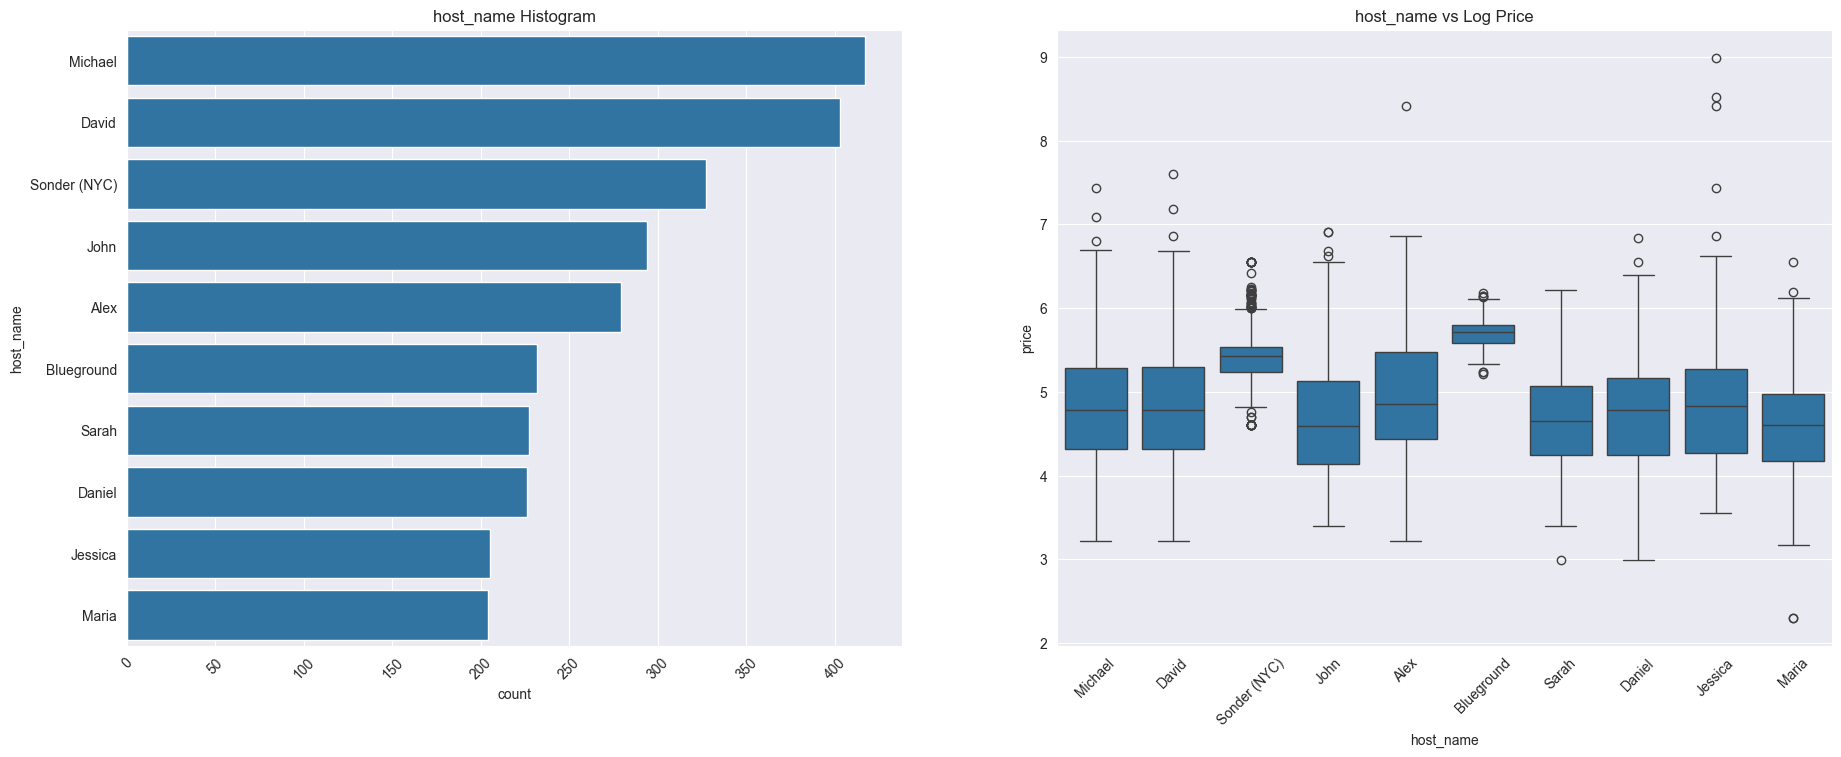

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


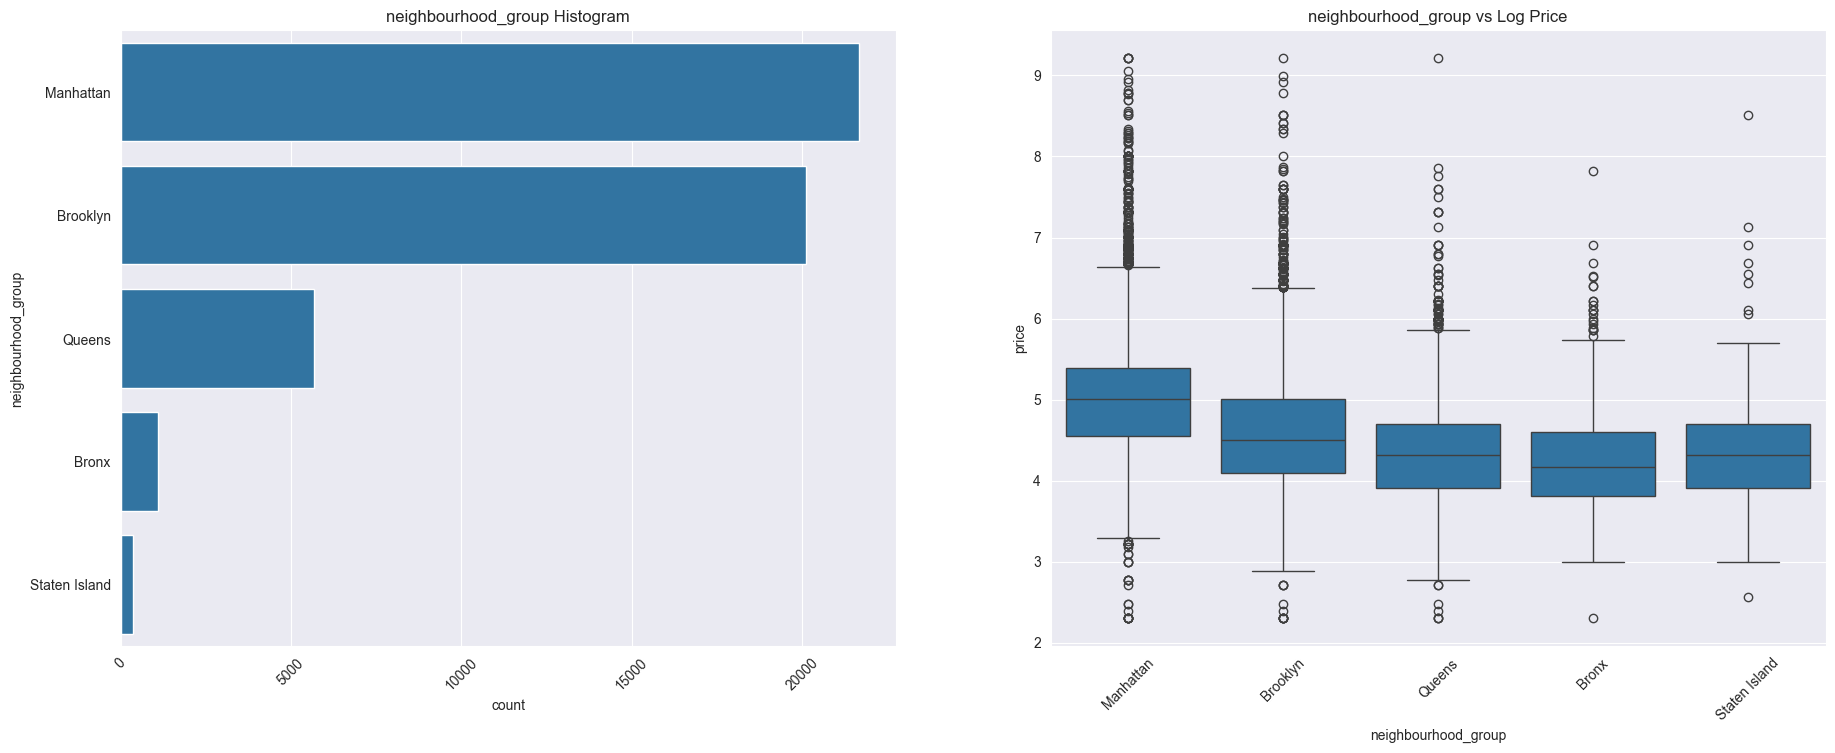

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


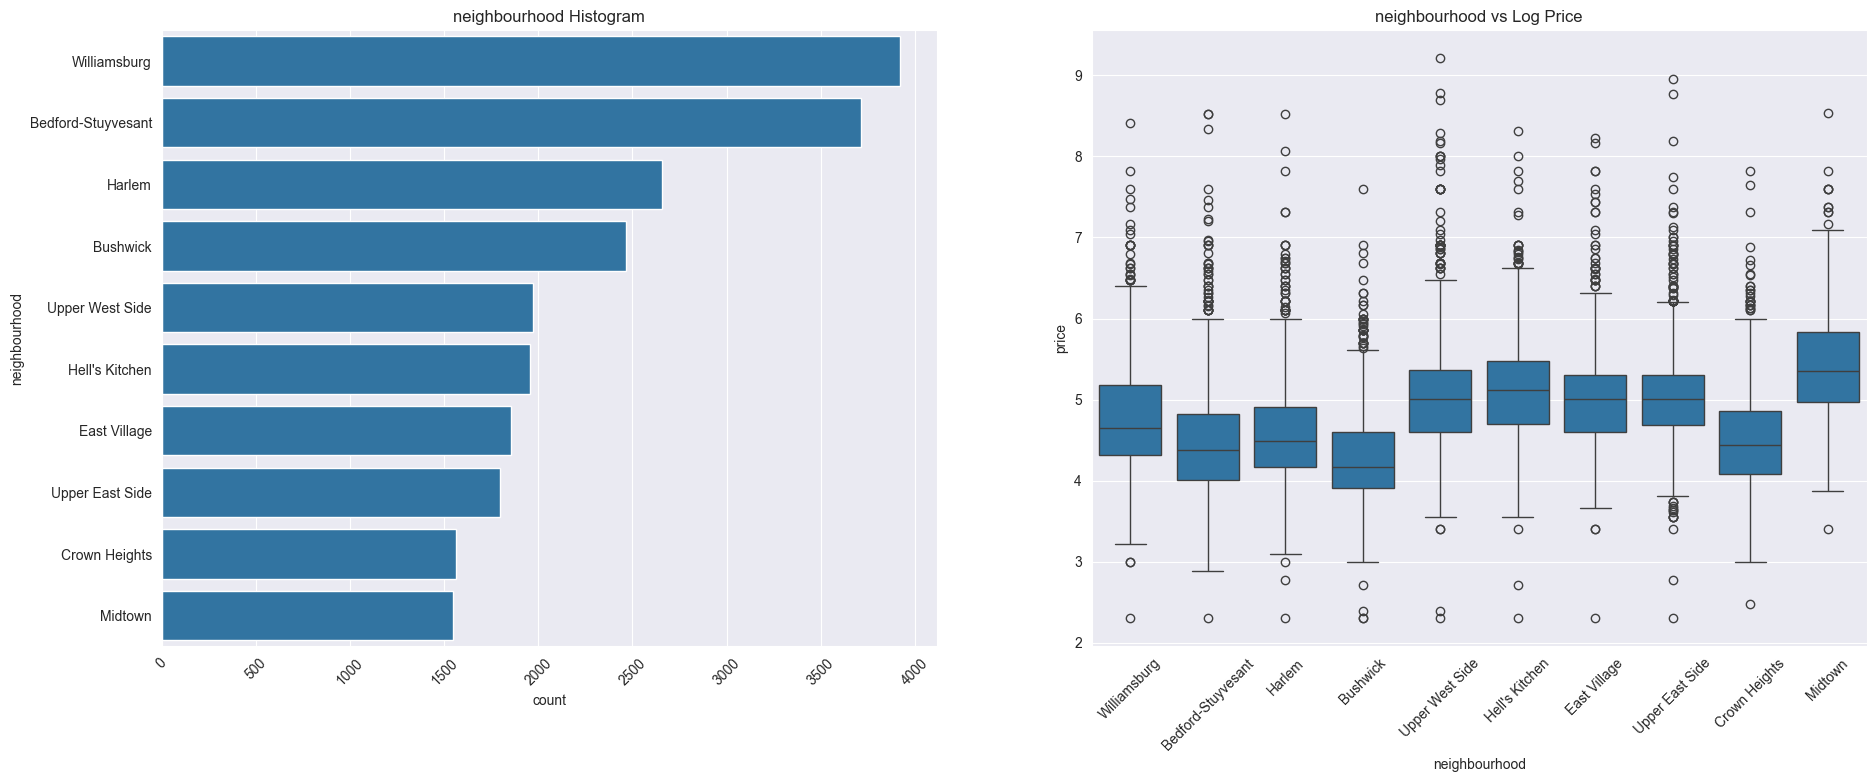

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


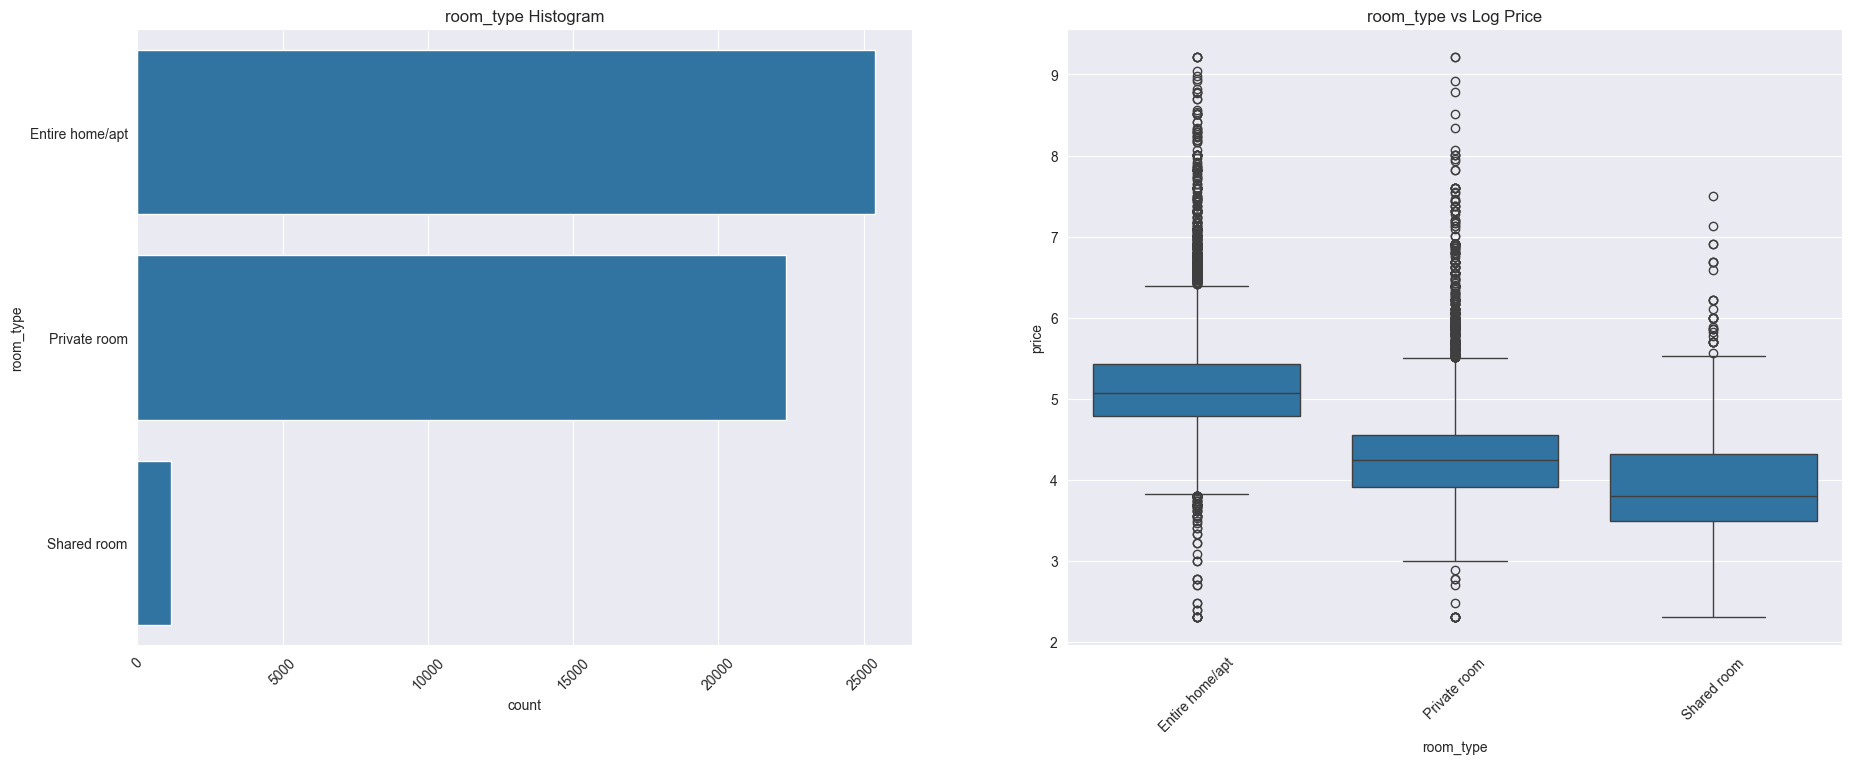

In [24]:
for column in categorical_cols:

    columne_most_freq = df[column].value_counts()[:10].sort_values(ascending=False).index

    if '' in columne_most_freq:
        columne_most_freq = columne_most_freq.drop('')

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 8))

    plt.subplot(1, 2, 1)
    plt.title(f'{column} Histogram')
    sns.countplot(
            df[df[column].isin(columne_most_freq)][column],
            order=columne_most_freq
            )
    plt.xticks(rotation=45)

    plt.subplot(1,2,2)
    plt.title(f'{column} vs Log Price')
    ax = sns.boxplot(
            x=df[df[column].isin(columne_most_freq)][column],
            y=np.log(df[df[column].isin(columne_most_freq)].price),
            order=columne_most_freq
            )
    plt.xticks(rotation=45)

    plt.show()

In [25]:
def One_Hot_Encoding(df, cat_columns):
    # Создаем dummy-переменные для категориальных признаков
    one_hot = pd.get_dummies(df[cat_columns])
    
    # Преобразуем логические значения (тип bool) в целые числа (тип int) в dummy-переменных
    bool_columns = one_hot.select_dtypes(include=[bool]).columns
    one_hot[bool_columns] = one_hot[bool_columns].astype(int)
    
    # Удаляем оригинальные категориальные признаки из исходного датафрейма
    df = df.drop(cat_columns, axis=1)
    
    # Объединяем исходный df с dummy-переменными
    df = pd.concat([df, one_hot], axis=1)
    
    return df

In [26]:
cat_columns = ['neighbourhood_group', 'room_type']

df = One_Hot_Encoding(df, cat_columns)

In [27]:
df.head(50)

,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
id,,,,,,,,,,,,,,,,,,,
2539,2787,John,Kensington,40.64749,-73.97237,149,1,9,0.21,6,365,0,1,0,0,0,0,1,0
2595,2845,Jennifer,Midtown,40.75362,-73.98377,225,1,45,0.38,2,355,0,0,1,0,0,1,0,0
3647,4632,Elisabeth,Harlem,40.80902,-73.94190,150,3,0,0.00,1,365,0,0,1,0,0,0,1,0
3831,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,1,270,4.64,1,194,0,1,0,0,0,1,0,0
5022,7192,Laura,East Harlem,40.79851,-73.94399,80,10,9,0.10,1,0,0,0,1,0,0,1,0,0
5099,7322,Chris,Murray Hill,40.74767,-73.97500,200,3,74,0.59,1,129,0,0,1,0,0,1,0,0
5121,7356,Garon,Bedford-Stuyvesant,40.68688,-73.95596,60,45,49,0.40,1,0,0,1,0,0,0,0,1,0
5178,8967,Shunichi,Hell's Kitchen,40.76489,-73.98493,79,2,430,3.47,1,220,0,0,1,0,0,0,1,0
5203,7490,MaryEllen,Upper West Side,40.80178,-73.96723,79,2,118,0.99,1,0,0,0,1,0,0,0,1,0


In [28]:
df.dtypes

host_id                                int64
host_name                             object
neighbourhood                         object
latitude                             float64
longitude                            float64
price                                  int64
minimum_nights                         int64
number_of_reviews                      int64
reviews_per_month                    float64
calculated_host_listings_count         int64
availability_365                       int64
neighbourhood_group_Bronx              int64
neighbourhood_group_Brooklyn           int64
neighbourhood_group_Manhattan          int64
neighbourhood_group_Queens             int64
neighbourhood_group_Staten Island      int64
room_type_Entire home/apt              int64
room_type_Private room                 int64
room_type_Shared room                  int64
dtype: object

In [29]:
len(df)

48895

In [30]:
# Проверка на наличие дубликатов в колонке 'host_id'
duplicates = df[df.duplicated(subset=['host_id'], keep=False)]

if duplicates.empty:
    print("В колонке 'host_id' нет дубликатов.")
else:
    # Получаем список уникальных значений host_id, которые имеют дубликаты
    duplicate_host_ids = duplicates['host_id'].unique().tolist()
    duplicates_count = len(duplicate_host_ids)
    print(f"Дубликаты в колонке 'host_id': {duplicates_count}")

Дубликаты в колонке 'host_id': 5154


Как видно из таблицы, в колонках host_id и host_name содержится одна и та же информация, можем безопасно избавиться от host_name

In [31]:
# удаление колонки host_name

df = df.drop(columns=['host_name'])

df.head(10)

,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
id,,,,,,,,,,,,,,,,,,
2539,2787,Kensington,40.64749,-73.97237,149,1,9,0.21,6,365,0,1,0,0,0,0,1,0
2595,2845,Midtown,40.75362,-73.98377,225,1,45,0.38,2,355,0,0,1,0,0,1,0,0
3647,4632,Harlem,40.80902,-73.94190,150,3,0,0.00,1,365,0,0,1,0,0,0,1,0
3831,4869,Clinton Hill,40.68514,-73.95976,89,1,270,4.64,1,194,0,1,0,0,0,1,0,0
5022,7192,East Harlem,40.79851,-73.94399,80,10,9,0.10,1,0,0,0,1,0,0,1,0,0
5099,7322,Murray Hill,40.74767,-73.97500,200,3,74,0.59,1,129,0,0,1,0,0,1,0,0
5121,7356,Bedford-Stuyvesant,40.68688,-73.95596,60,45,49,0.40,1,0,0,1,0,0,0,0,1,0
5178,8967,Hell's Kitchen,40.76489,-73.98493,79,2,430,3.47,1,220,0,0,1,0,0,0,1,0
5203,7490,Upper West Side,40.80178,-73.96723,79,2,118,0.99,1,0,0,0,1,0,0,0,1,0


In [32]:
df.dtypes

host_id                                int64
neighbourhood                         object
latitude                             float64
longitude                            float64
price                                  int64
minimum_nights                         int64
number_of_reviews                      int64
reviews_per_month                    float64
calculated_host_listings_count         int64
availability_365                       int64
neighbourhood_group_Bronx              int64
neighbourhood_group_Brooklyn           int64
neighbourhood_group_Manhattan          int64
neighbourhood_group_Queens             int64
neighbourhood_group_Staten Island      int64
room_type_Entire home/apt              int64
room_type_Private room                 int64
room_type_Shared room                  int64
dtype: object

Пробуем перекодировать значения колонки neighbourhood с помощью LabelEncoder

In [33]:
from sklearn.preprocessing import LabelEncoder

# Создаем экземпляр LabelEncoder
label_encoder = LabelEncoder()

# Применяем Label Encoding к колонке neighbourhood
df['neighbourhood_encoded'] = label_encoder.fit_transform(df['neighbourhood'])

# Выводим первые несколько строк для проверки
print(df[['neighbourhood', 'neighbourhood_encoded']].head(30))

# Создаем словарь для раскодирования
neighbourhood_encoding_dict = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

# Приводим ключи словаря к типу int
neighbourhood_encoding_dict = {int(k): v for k, v in neighbourhood_encoding_dict.items()}

# Выводим словарь
print("\nСловарь для раскодирования neighbourhood:")
print(neighbourhood_encoding_dict)


           neighbourhood  neighbourhood_encoded
id                                             
2539          Kensington                    108
2595             Midtown                    127
3647              Harlem                     94
3831        Clinton Hill                     41
5022         East Harlem                     61
5099         Murray Hill                    137
5121  Bedford-Stuyvesant                     13
5178      Hell's Kitchen                     95
5203     Upper West Side                    202
5238           Chinatown                     35
5295     Upper West Side                    202
5441      Hell's Kitchen                     95
5803         South Slope                    182
6021     Upper West Side                    202
6090        West Village                    209
6848        Williamsburg                    214
7097         Fort Greene                     80
7322             Chelsea                     34
7726       Crown Heights                

In [34]:
df.dtypes

host_id                                int64
neighbourhood                         object
latitude                             float64
longitude                            float64
price                                  int64
minimum_nights                         int64
number_of_reviews                      int64
reviews_per_month                    float64
calculated_host_listings_count         int64
availability_365                       int64
neighbourhood_group_Bronx              int64
neighbourhood_group_Brooklyn           int64
neighbourhood_group_Manhattan          int64
neighbourhood_group_Queens             int64
neighbourhood_group_Staten Island      int64
room_type_Entire home/apt              int64
room_type_Private room                 int64
room_type_Shared room                  int64
neighbourhood_encoded                  int64
dtype: object

In [35]:
# Сможем безопасно удалить колонку neighbourhood
df.drop(columns=['neighbourhood'], inplace=True)

In [36]:
df.head(10)

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_encoded
id,,,,,,,,,,,,,,,,,,
2539,2787,40.64749,-73.97237,149,1,9,0.21,6,365,0,1,0,0,0,0,1,0,108
2595,2845,40.75362,-73.98377,225,1,45,0.38,2,355,0,0,1,0,0,1,0,0,127
3647,4632,40.80902,-73.94190,150,3,0,0.00,1,365,0,0,1,0,0,0,1,0,94
3831,4869,40.68514,-73.95976,89,1,270,4.64,1,194,0,1,0,0,0,1,0,0,41
5022,7192,40.79851,-73.94399,80,10,9,0.10,1,0,0,0,1,0,0,1,0,0,61
5099,7322,40.74767,-73.97500,200,3,74,0.59,1,129,0,0,1,0,0,1,0,0,137
5121,7356,40.68688,-73.95596,60,45,49,0.40,1,0,0,1,0,0,0,0,1,0,13
5178,8967,40.76489,-73.98493,79,2,430,3.47,1,220,0,0,1,0,0,0,1,0,95
5203,7490,40.80178,-73.96723,79,2,118,0.99,1,0,0,0,1,0,0,0,1,0,202


In [37]:
df.dtypes

host_id                                int64
latitude                             float64
longitude                            float64
price                                  int64
minimum_nights                         int64
number_of_reviews                      int64
reviews_per_month                    float64
calculated_host_listings_count         int64
availability_365                       int64
neighbourhood_group_Bronx              int64
neighbourhood_group_Brooklyn           int64
neighbourhood_group_Manhattan          int64
neighbourhood_group_Queens             int64
neighbourhood_group_Staten Island      int64
room_type_Entire home/apt              int64
room_type_Private room                 int64
room_type_Shared room                  int64
neighbourhood_encoded                  int64
dtype: object

## Платформа проверки (Validation framework)

In [38]:
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

In [39]:
y_train_orig = df_train.price.values
y_val_orig = df_val.price.values
y_test_orig = df_test.price.values

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

## Линейная регрессия (Linear Regression)

In [40]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack((ones, X))
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

### Базовое решение

In [41]:
base = [
    'host_id',
    'longitude',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365',
    'neighbourhood_group_Bronx',
    'neighbourhood_group_Brooklyn',
    'neighbourhood_group_Manhattan',
    'neighbourhood_group_Queens',
    'room_type_Entire home/apt',
    'room_type_Private room',
    'neighbourhood_encoded'
]

In [42]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [43]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [44]:
y_pred = w_0 + X_train.dot(w)

In [45]:
y_train

array([5.01727984, 5.3981627 , 5.01727984, ..., 5.19849703, 4.59511985,
       3.49650756])

In [46]:
y_pred

array([5.28602168, 5.29441292, 5.1160066 , ..., 5.24333591, 5.23040204,
       4.40025252])

#### Оценка базового решения

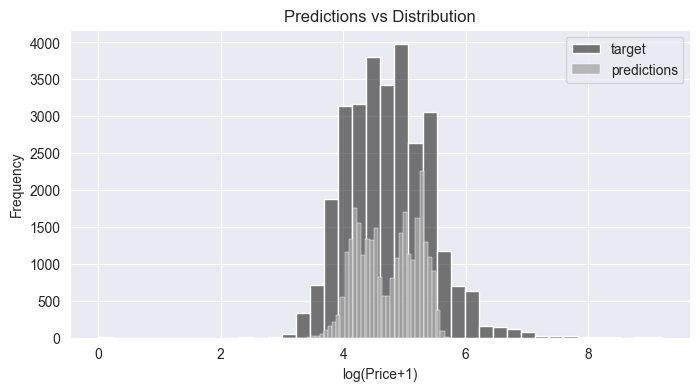

In [47]:
plt.figure(figsize=(8, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='predictions', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('log(Price+1)')
plt.title('Predictions vs Distribution')

plt.show()

In [48]:
def mean_absolute_percentage_error(y_train, y_pred):
    mask = y_train != 0  # маска для значений, не равных нулю
    return np.mean(np.abs((y_pred[mask] - y_train[mask]) / y_train[mask])) * 100

In [49]:
# Вычисление MAPE
mape = mean_absolute_percentage_error(y_train, y_pred)
print(f"Mean Absolute Percentage Error: {mape:.2f}%")

Mean Absolute Percentage Error: 7.54%


In [50]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse).item()

In [51]:
rmse(y_train, y_pred)

0.4995198080951276

In [52]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [53]:
rmse(y_val, y_pred)

0.49066216745151975

Переменные 'neighbourhood_group_Staten Island' и 'room_type_Shared room' сильно ухудшают показатели, было принято решение об их исключении из выборки